## Graph node classification problem
### Given a labeled graph where some nodes' labels are missing, find a probability distribution over possibel labels for each node.

In [4]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

# test with small graph and two labels, {1,0}

In [5]:

# Create an undirected graph
G = nx.Graph()

numNodes = 20

# Add numNOdes
G.add_nodes_from(range(numNodes))

# Randomly select k nodes and label them with "0" or "1"
labels = random.sample(range(numNodes), int(numNodes*0.5))
node_labels = {node: random.choice([0, 1]) for node in labels}
nx.set_node_attributes(G, node_labels, "label")

# Add random edges between nodes
num_edges = random.randint(50, 100)  # Random number of edges between n1 and n2
for _ in range(num_edges):
    u, v = random.sample(range(numNodes), 2)  # Pick two random distinct nodes
    G.add_edge(u, v)





## initialize probability
1) For nodes with labels known, P(c) = 1, for label, "c"
2) For nodes with unknown label, P(c1) = 1/2, P(c2) = 1/2


In [6]:
'''
initilize the probability  dictionary
key : node id
value: {0:p(0), 1:P(1)}

'''


prob ={}

#initilization
for i in range(len(G)):
    if 'label' in G.nodes[i]:
        if G.nodes[i]['label'] == 0:
            p = {0:1,1:0}
        else:
            p = {0:0,1:1}

    else:
        p = {0:0.5,1:0.5}


    prob[i] = p               

## Probabilistic Relational Classifier

* node v, it's label $Y_v$
* class probability of node v is a weighted average of class probabilities of it's neighbours.
* For labeled nodes v,initilaize label $Y_v$ with ground truth $Y_v^*$
* For unlabeled nodes, initialize $P(Y_v = c) = 0.5$
*  **update** all nodes in a random order until convergence or until maximum number of iteraitons reached

* **Update** for each node v and label c(0 or 1)
$$P(Y_v =c) = \frac{1}{\sum_{(v,u) \in E} A_{v,u}} \sum_{(v,u) \in E}A_{v,u} P(Y_u = c)  $$

$P(Y_v =c)$ is the probability of node v having label c.

In [7]:
def updateProb(adjMatrix,Prob,unlabeledNodes):
    A = adjMatrix
    for i in unlabeledNodes:
        K = np.sum(adjMatrix[i])
        summ0 = 0 
        summ1 = 0
        for j in range(len(adjMatrix)):
            summ0 += A[i,j]*Prob[j][0]
            summ1 += A[i,j]*Prob[j][1]
        p0 =  summ0/K
        p1 = summ1/K

        Prob[i][0] = p0
        Prob[i][1] = p1

    return Prob      

In [8]:
unlabeledNodes = [ i for i in range(len(G)) if 'label' not in G.nodes[i]]
adjMatrix = nx.adjacency_matrix(G).toarray() 
for _ in range(50):
    prob = updateProb(adjMatrix, prob, unlabeledNodes)

In [9]:
prob

{0: {0: 1, 1: 0},
 1: {0: 0.1725791091364403, 1: 0.8274208908635597},
 2: {0: 0.20805376395508204, 1: 0.7919462360449181},
 3: {0: 0.26509986751364245, 1: 0.7349001324863575},
 4: {0: 0, 1: 1},
 5: {0: 0.19354694148642315, 1: 0.8064530585135768},
 6: {0: 0, 1: 1},
 7: {0: 0, 1: 1},
 8: {0: 1, 1: 0},
 9: {0: 0.3187228270588957, 1: 0.6812771729411042},
 10: {0: 0.1540240770848069, 1: 0.845975922915193},
 11: {0: 0, 1: 1},
 12: {0: 0.2721341512920217, 1: 0.7278658487079784},
 13: {0: 0.22852136404196577, 1: 0.7714786359580342},
 14: {0: 0, 1: 1},
 15: {0: 1, 1: 0},
 16: {0: 0.23429345119815098, 1: 0.7657065488018491},
 17: {0: 0, 1: 1},
 18: {0: 0.10602831673815219, 1: 0.8939716832618477},
 19: {0: 0, 1: 1}}

In [10]:
def assignLabel(unlabeledNodes,prob,G):
    for node in unlabeledNodes:
        if prob[node][0] > prob[node][1]:
            G.nodes[node]['label'] = 0
        else:
            G.nodes[node]['label'] = 1

    return G
            
        

In [11]:
G = assignLabel(unlabeledNodes, prob, G)

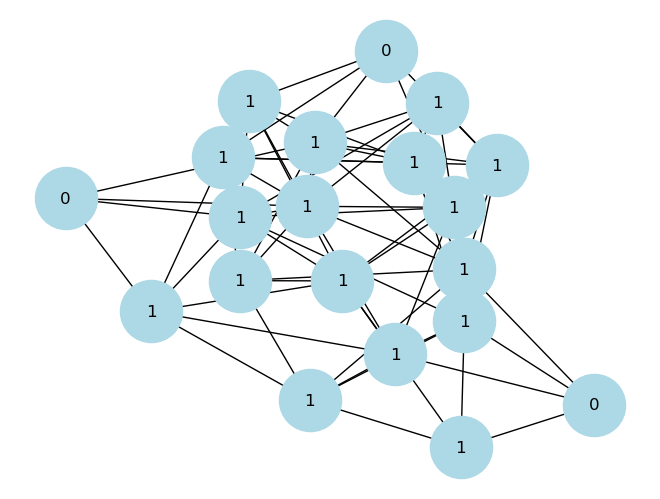

In [12]:


# Get the positions for the nodes in the graph
pos = nx.spring_layout(G)  # You can choose other layouts like `circular_layout`, `shell_layout`, etc.

# Draw the graph without node IDs
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=2000, font_size=10)

# Extract the node labels (assumed to be stored as an attribute 'label')
labels = nx.get_node_attributes(G, 'label')

# Draw the custom labels on the nodes
nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', font_size=12)

# Display the graph
plt.show()


# **************************************************

# Node classification for firm network

In [13]:
#load preprocessed GCC

G = nx.read_graphml("FirmGraphUNweightedSctrLabled.graphml")

In [15]:
print(G)

DiGraph with 78020 nodes and 175130 edges


In [14]:
#list of unlabeled nodes
#unlabeledNodes = [ str(i) for i in range(len(G)) if 'label' not in G.nodes[str(i)]]

In [16]:
# list of unique labels  
labels = list(set([ G.nodes[str(i)]['label'] for i in range(len(G)) if 'label'  in G.nodes[str(i)]]))

In [25]:
'''
- initialize the probability data structure : lists of list
- each node has a list 
- the list corresponding to a node contains,probability of that node having a certain label
- eg: p[5][13] : probability of node 5 having label 13

'''


prob = []
N = len(labels)
for i in range(len(G)):
    p = [ 0 for label in labels]
    if 'label' in G.nodes[str(i)]:
        p[G.nodes[str(i)]['label']] = 1
    else:
        p = [1/N for label in labels]

    prob.append(p)

In [26]:
unlabeledNodes = [ i for i in range(len(G)) if 'label' not in G.nodes[str(i)]]
adjMatrix = nx.adjacency_matrix(G) #sparse adjacency matrix

In [40]:
len(unlabeledNodes)

38630

In [27]:
def updateProb(G,Prob,unlabeledNodes):
    A = adjMatrix
    for i in unlabeledNodes:
        nghbrs = list(G.neighbors(str(i)))
        N = len(nghbrs)
        #print(i)
        if N != 0:
            for k in range(0,289):
                summ = 0
                for j in nghbrs:
                    
                    summ += Prob[int(j)][k]
                if N == 0 :
                    print('i:',i,'N:',N)
                Prob[i][k] = summ/ N


            
    return Prob    

In [28]:
for _ in range(5):
    prob = updateProb(G, prob, unlabeledNodes)


In [ ]:
def assignLabel(unlabeledNodes,prob,G):
    for node in unlabeledNodes:
        indx =  np.argmax(prob[node])
        
        
        
       

    return G
            
        